In [1]:
execfile('setting.py')
from IPython.core.display import display, HTML
display(HTML("<style> .container{width:90% !important;}</style>"))


import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [2]:
%matplotlib inline 

In [3]:
def dist(x):
    if x==0:
        return 0
    else: 
        return 1
    

In [4]:
df_raw = pd.read_csv(path1 + "보험2.csv")
df_raw.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,CRDT_LOAN_CNT,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,...,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT
0,1,공무원,5000,7000,4,1,0,0,0,0,...,9001,9001,9001,0,1,0,2,13,3,420001
1,2,자영업,5000,8000,4,2,0,0,0,0,...,24001,0,24001,0,0,0,2,121,0,0
2,3,주부,3000 미만,4000,4,1,0,0,0,0,...,15001,9001,0,3001,1,25,4,121,0,0
3,4,학생,3000 미만,10000,2,1,0,0,0,0,...,6001,3001,0,3001,1,25,4,61,0,0
4,5,공무원,4000,4000,4,1,0,0,0,0,...,21001,15001,21001,0,1,0,1,97,0,0


In [5]:
df_raw["CNTT_LAMT_CNT"]=df_raw["CNTT_LAMT_CNT"].apply(dist)

In [6]:
df_raw['CNTT_LAMT_CNT'].unique()

array([0, 1])

In [7]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                     test_size = 0.4, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (58837, 51)
test data size : (39225, 51)


In [8]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,CUST_ID,ACTL_FMLY_NUM,CUST_FMLY_NUM,CRDT_LOAN_CNT,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE,STRT_CRDT_GRAD,...,LT1Y_PEOD_RATE_40미만,LT1Y_PEOD_RATE_50미만,LT1Y_PEOD_RATE_60미만,LT1Y_PEOD_RATE_90미만,LT1Y_PEOD_RATE_90이상,AGE_20대,AGE_30대,AGE_40대,AGE_50대,AGE_60대 이상
0,1,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop(["CNTT_LAMT_CNT","CUST_ID","LT1Y_CTLT_CNT"], axis = 1, inplace = False)
#df_raw_x.columns=[i for i in range(len(df_raw_x.columns))]
df_raw_y = df_raw_dummy["CNTT_LAMT_CNT"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (98062, 90)
분할 후 설명변수 데이터 :Train (58837, 90)   Test (39225, 90)


In [10]:
   !pip install imblearn

In [11]:
# 샘플링 : Over-sampling 등
from imblearn.over_sampling import SMOTE

In [12]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')

# train데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

# 결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    53915
1     4922
Name: CNTT_LAMT_CNT, dtype: int64 

Over-Sampling 후 Train X: (107830, 90)
Over-Sampling 후 Train Y: (107830,) 

Over-Sampling 후 '1':53915
Over-Sampling 후 '0':53915


In [13]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    x_resampled, y_resampled, test_size = 0.4, stratify=y_resampled, random_state = 1234)
print("분할 전 데이터 현황... 설명:", x_resampled.shape, "  목표:", y_resampled.shape)
print("분할 후 설명변수 현황...Train:", df_train_x.shape, " Test:", df_test_x.shape)
print("분할 후 목표변수 현황...Train:", df_train_y.value_counts(), " Test:", df_test_y.value_counts())

분할 전 데이터 현황... 설명: (107830, 90)   목표: (107830,)
분할 후 설명변수 현황...Train: (64698, 90)  Test: (43132, 90)
분할 후 목표변수 현황...Train: 1    32349
0    32349
Name: CNTT_LAMT_CNT, dtype: int64  Test: 1    21566
0    21566
Name: CNTT_LAMT_CNT, dtype: int64


In [14]:
tree_uncustomized = DecisionTreeClassifier(max_depth = 6, random_state=1234 )
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

DecisionTreeClassifier(max_depth=6, random_state=1234)

Accuracy on training set: 0.845
Accuracy on test set: 0.841


In [19]:
tree_final = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=4, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=20,
                       random_state=1234)

In [20]:
# 변수명 저장
v_feature_name = df_train_x.columns

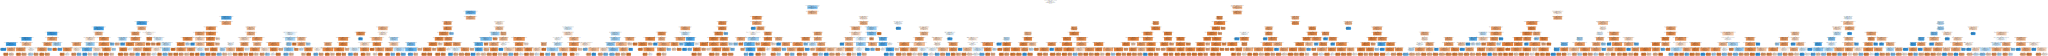

In [21]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["0", "1",'2','3','4','5','6','7'],
# export_graphviz(tree_final, out_file="tree_final.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [22]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.893

Confusion matrix: 
[[20425  1141]
 [ 3455 18111]]
              precision    recall  f1-score   support

           0      0.855     0.947     0.899     21566
           1      0.941     0.840     0.887     21566

    accuracy                          0.893     43132
   macro avg      0.898     0.893     0.893     43132
weighted avg      0.898     0.893     0.893     43132



In [26]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3).head(5)


,Feature,Importance
76,LT1Y_PEOD_RATE_0,0.228
19,MAX_MON_PREM,0.102
77,LT1Y_PEOD_RATE_10미만,0.101
78,LT1Y_PEOD_RATE_20미만,0.087
29,BNK_LNIF_CNT,0.065


<Figure size 1000x500 with 0 Axes>

<BarContainer object of 90 artists>

([<matplotlib.axis.YTick at 0x7ff524218ac0>,
 [Text(0, 0, 'HSHD_INFR_INCM_3000'),
  Text(0, 1, 'LT1Y_CLOD_RATE'),
  Text(0, 2, 'TOT_CRLN_AMT'),
  Text(0, 3, 'HSHD_INFR_INCM_7000'),
  Text(0, 4, 'CRLN_30OVDU_RATE'),
  Text(0, 5, 'HSHD_INFR_INCM_8000'),
  Text(0, 6, 'OCCP_NAME_G_고소득 전문직'),
  Text(0, 7, 'HSHD_INFR_INCM_6000'),
  Text(0, 8, 'OCCP_NAME_G_전문직'),
  Text(0, 9, 'OCCP_NAME_G_기업/단체 임원'),
  Text(0, 10, 'OCCP_NAME_G_기타'),
  Text(0, 11, 'HSHD_INFR_INCM_4000'),
  Text(0, 12, 'OCCP_NAME_G_단순 사무직'),
  Text(0, 13, 'OCCP_NAME_G_사무직'),
  Text(0, 14, 'OCCP_NAME_G_예체능계 종사자'),
  Text(0, 15, 'OCCP_NAME_G_학생'),
  Text(0, 16, 'HSHD_INFR_INCM_5000'),
  Text(0, 17, 'OCCP_NAME_G_1차산업 종사자'),
  Text(0, 18, 'CUST_JOB_INCM_7000'),
  Text(0, 19, 'CUST_JOB_INCM_8000 이상'),
  Text(0, 20, 'HSHD_INFR_INCM_11000 이상'),
  Text(0, 21, 'OCCP_NAME_G_공무원'),
  Text(0, 22, 'OCCP_NAME_G_단순 노무직'),
  Text(0, 23, 'OCCP_NAME_G_운전직'),
  Text(0, 24, 'CUST_JOB_INCM_6000'),
  Text(0, 25, 'HSHD_INFR_INCM_3000 미만'),
  Text(0, 

Text(0.5, 0, '설명변수 중요도')

Text(0, 0.5, '설명변수')

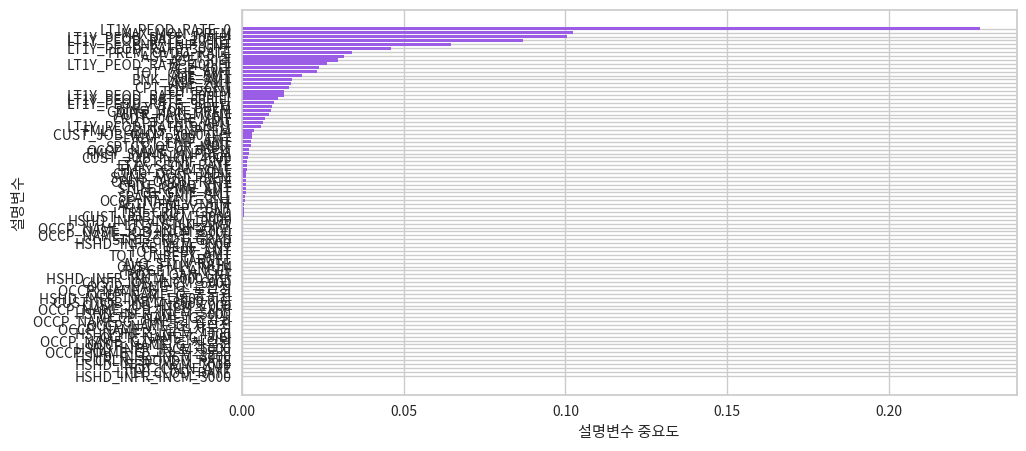

In [24]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")